<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [65]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [92]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

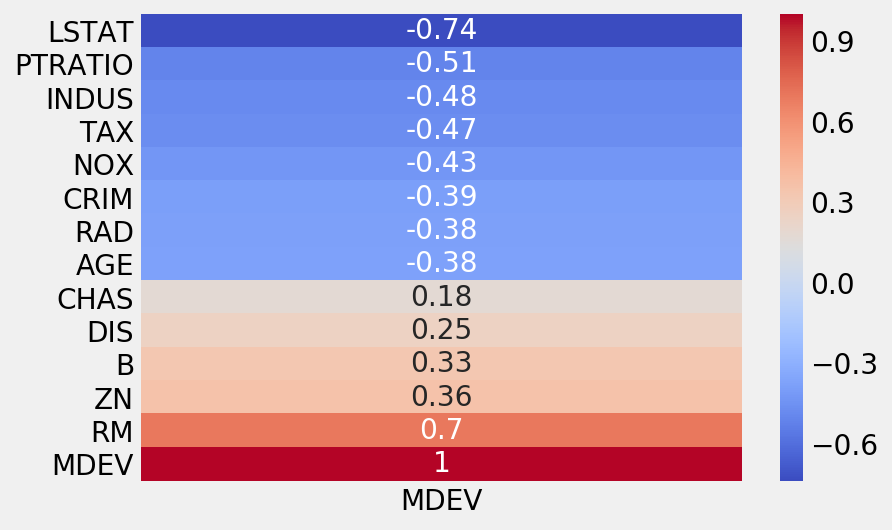

In [90]:
#sns.heatmap(df.corr()[['MDEV']].sort_values('MDEV'), annot = True, cmap= 'coolwarm')

In [218]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [91]:
# A:
X.info() #All looks good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MDEV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [81]:
X.shape

(506, 13)

In [93]:
X_mod_1 = X[["RM", "LSTAT", "PTRATIO"]]
X_mod_1.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [390]:
# A: 50/50 SPLIT
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_mod_1, y)

In [391]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [392]:
lr.score(X_train, y_train)

0.6739921577993162

In [394]:
lr.score(X_test, y_test)

0.6900137334791825

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a2dfa58>,
      dtype=object)

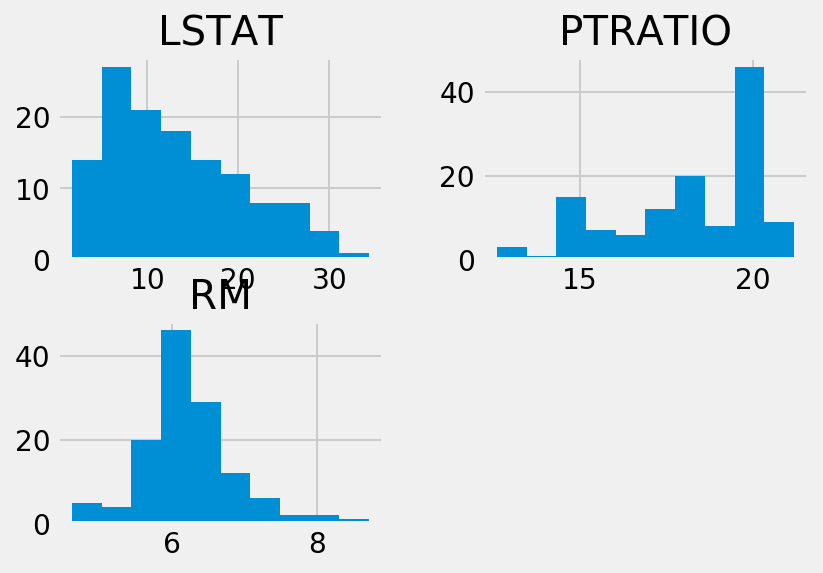

In [395]:
X_test.hist()

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [396]:
# A: 70/30 SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_mod_1, y, test_size = .3)

In [397]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [398]:
lr.score(X_train, y_train)

0.7067567526488641

In [399]:
lr.score(X_test, y_test)

0.606004231324246

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a749828>,
      dtype=object)

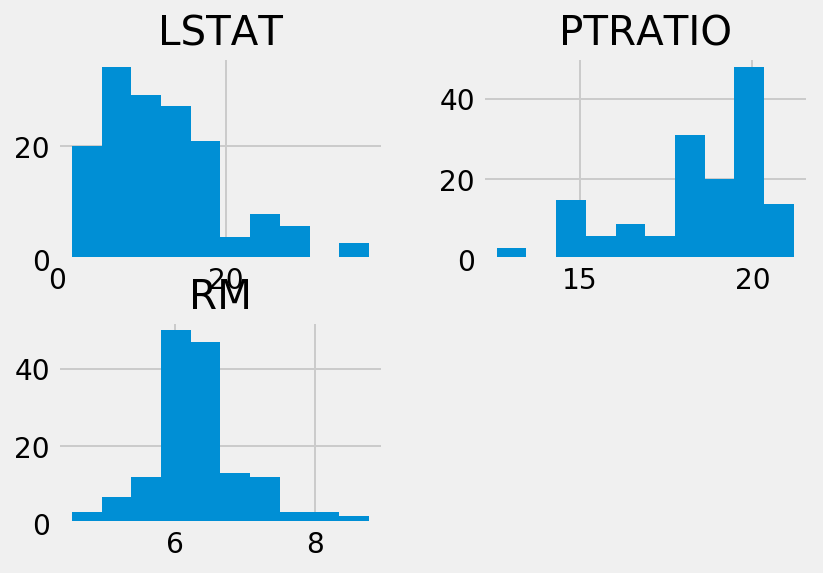

In [400]:
X_test.hist()

In [413]:
#90/10 SPLIT 
X_train, X_test, y_train, y_test = train_test_split(X_mod_1, y, test_size = .1)

In [414]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [415]:
lr.score(X_train, y_train)

0.6746075002879439

In [416]:
lr.score(X_test, y_test)

0.7104092980274758

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ad4f668>,
      dtype=object)

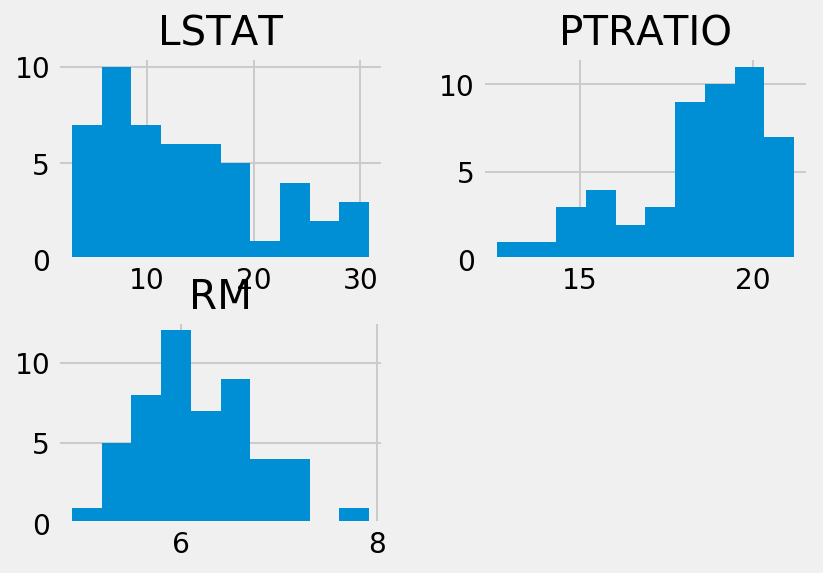

In [417]:
X_test.hist()

In [418]:
X['Indzone_Interaction'] = X['INDUS'] * X['ZN']

In [425]:
X_mod_2 = X[['Indzone_Interaction', "RM", "LSTAT", "PTRATIO"]]
X_mod_2.head()

,Indzone_Interaction,RM,LSTAT,PTRATIO
0,41.58,6.575,4.98,15.3
1,0.00,6.421,9.14,17.8
2,0.00,7.185,4.03,17.8
3,0.00,6.998,2.94,18.7
4,0.00,7.147,5.33,18.7


In [426]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_2, y)

In [427]:
lr.score(X_train, y_train)

0.6850870937043311

In [428]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [429]:
lr.score(X_test, y_test)

0.6328104660819798

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2aab64a8>,
      dtype=object)

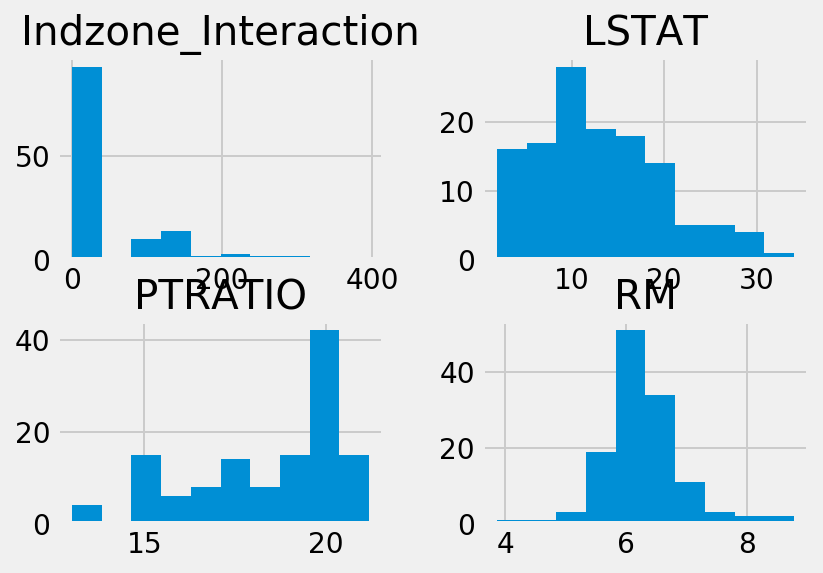

In [430]:
X_test.hist()

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_2, y, test_size = .3)

In [452]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [453]:
lr.score(X_train, y_train)

0.6989247890226897

In [454]:
lr.score(X_test, y_test)

0.6342107888163953

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c2258d0>,
      dtype=object)

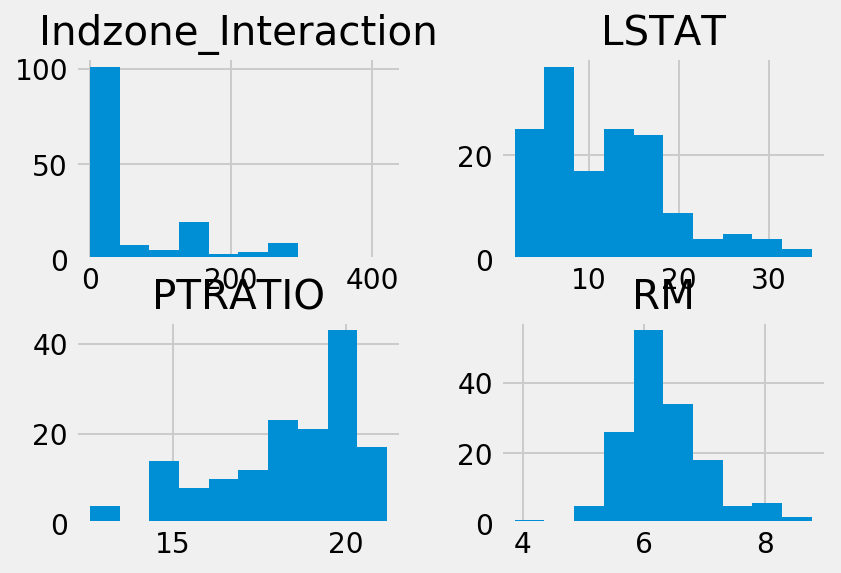

In [455]:
X_test.hist()

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_2, y, test_size = .1)

In [459]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [460]:
lr.score(X_train, y_train)

0.696861120034963

In [461]:
lr.score(X_test, y_test)

0.4572378562316235

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c4ba668>,
      dtype=object)

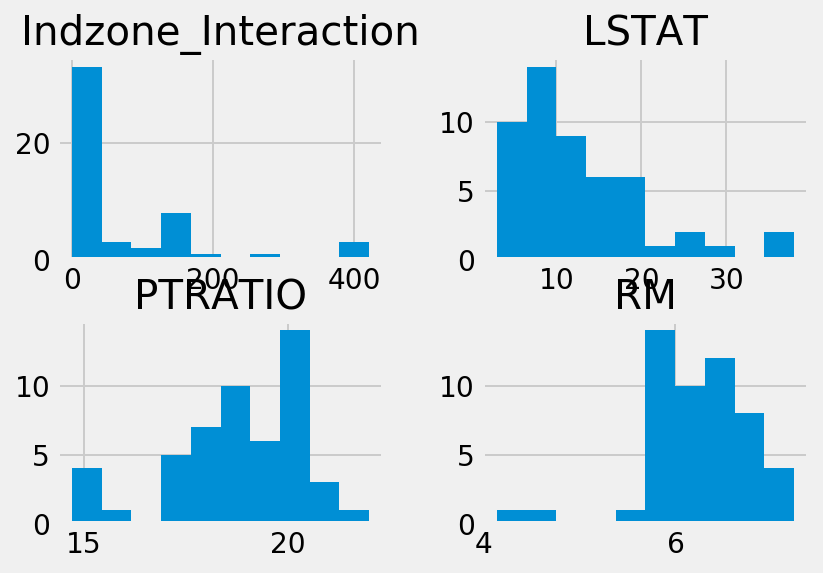

In [462]:
X_test.hist()

In [463]:
X['TAXRM_interaction'] = X['TAX'] * X['RM']

In [464]:
X['PTRATIOCRIM_inter'] = X['PTRATIO'] * X['CRIM']

In [465]:
X_mod_3 = X[['Indzone_Interaction', "TAXRM_interaction", "PTRATIOCRIM_inter"]]
X_mod_3.head()

,Indzone_Interaction,TAXRM_interaction,PTRATIOCRIM_inter
0,41.58,1946.200,0.096696
1,0.00,1553.882,0.486118
2,0.00,1738.770,0.485762
3,0.00,1553.556,0.605319
4,0.00,1586.634,1.291235


In [466]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_3, y)

In [467]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [468]:
lr.score(X_train, y_train)

0.18942440020642015

In [469]:
lr.score(X_test, y_test)

0.217063754796897

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bb8e5c0>,
      dtype=object)

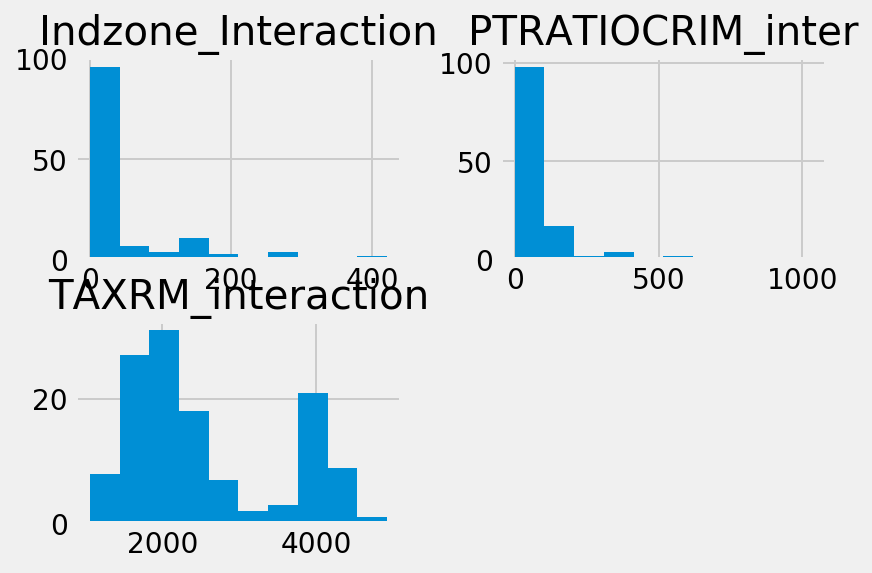

In [445]:
X_test.hist()

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_3, y, test_size = .3)

In [447]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [448]:
lr.score(X_test, y_test)

0.17897085360534684

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bdf0390>,
      dtype=object)

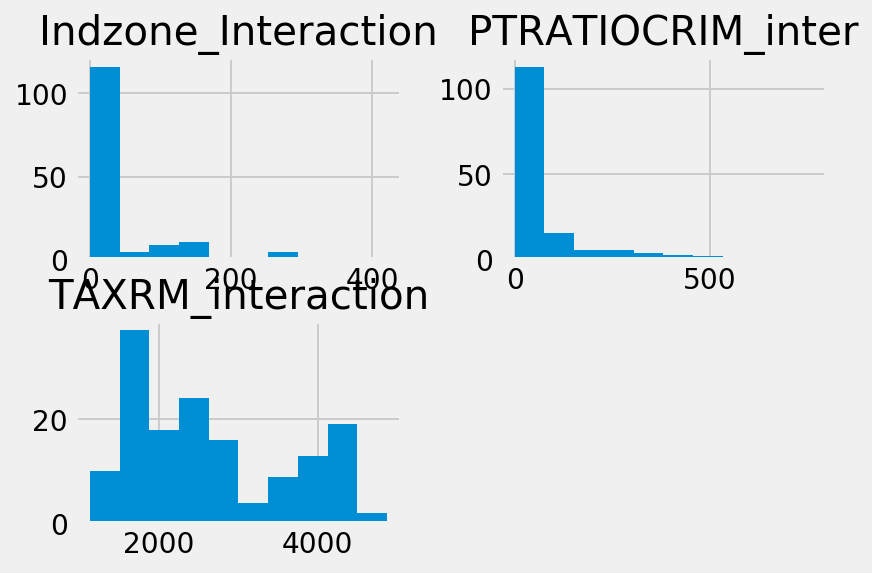

In [449]:
X_test.hist()

QUESTION - How do your metrics change?
    ANSWER - There is significantly more variance because of the smaller test set.  I think that my scores got better with the smaller test set, but there's a bunch of variance and it's hard to tell.

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 

A) Depends what you're looking for?  5 seems to average your variance to something very stable, whereas 10 gives you a more realistic level of variance to expect. 
- How do your scores change?  

A)The variance of your r^2 goes down because it is averaged a bunch 
- What is the variance of scores like?

A)Smaller

- Try out different folds to get a sense of how this impacts your score.

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_mod_2, y, test_size = .3)

In [384]:
# A:
from sklearn.model_selection import KFold, cross_val_score
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)

cv_scores


array([0.61344831, 0.73721674, 0.81782604, 0.65261516, 0.77216641])

In [385]:
cv_scores.mean()

0.7186545300361393

In [378]:

print('cv score', cross_val_score(lr, X_train, y_train, cv=5).mean())

lr.fit(X_train, y_train)
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test,y_test))

cv score 0.649671812849214
train score 0.6752153830281395
test score 0.6899296573373188


In [379]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=2).mean())

lr.fit(X_train, y_train)
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test,y_test))

cv score 0.6339008252098433
train score 0.6752153830281395
test score 0.6899296573373188


In [380]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())

lr.fit(X_train, y_train)
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test,y_test))

cv score 0.632090505407157
train score 0.6752153830281395
test score 0.6899296573373188


In [381]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=100).mean())

lr.fit(X_train, y_train)
print('train score', lr.score(X_train, y_train))

print('test score', lr.score(X_test,y_test)) #What's going on here?!?!? wahhhh crazy variance!

cv score -0.9757063782196478
train score 0.6752153830281395
test score 0.6899296573373188


### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [8]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [9]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [10]:
import patsy

# A: